In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [2]:
data = pd.read_csv("C:/Users/HPPC/Downloads/super_store.csv")
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [3]:
data.shape

(9800, 18)

In [4]:
data.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

In [5]:
data.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [6]:
data.duplicated().sum()

0

I decisded to drop the postal code column beva

In [7]:
data.dropna(subset=['Postal Code'], inplace = True)

In [8]:
Q1 = data['Sales'].quantile(0.25)
Q3 = data['Sales'].quantile(0.75)
IQR = Q3 - Q1

# Finding outliers
outliers = data[(data['Sales'] < (Q1 - 1.5 * IQR)) | (data['Sales'] > (Q3 + 1.5 * IQR))]


# Step 2: Count the number of outliers
num_outliers = outliers.shape[0]

print(f"Number of outliers: {num_outliers}")

# Define limits
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
cleaned_data = data[(data['Sales'] >= lower_bound) & (data['Sales'] <= upper_bound)]


Number of outliers: 1141


In [9]:
data.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [10]:
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%d/%m/%Y') # Specify the correct format for day/month/year
data['Ship Date'] = pd.to_datetime(data['Ship Date'], format='%d/%m/%Y') # Apply the same format for consistency

In [11]:
data.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [12]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

Text(0, 0.5, 'Sales')

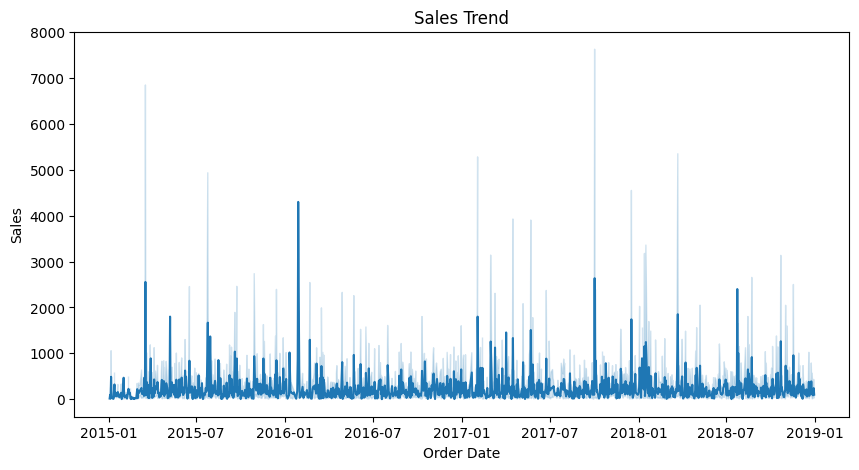

In [13]:
plt.figure(figsize = (10, 5))
sns.lineplot(data = data , x = 'Order Date', y = 'Sales')
plt.title('Sales Trend')
plt.xlabel('Order Date')
plt.ylabel('Sales')

Text(0, 0.5, 'Sales')

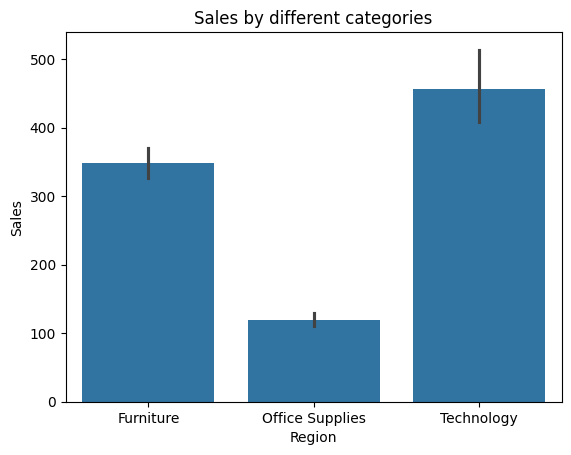

In [14]:
sns.barplot(data = data, x = 'Category', y = 'Sales')
plt.title('Sales by different categories')
plt.xlabel('Region')
plt.ylabel('Sales')

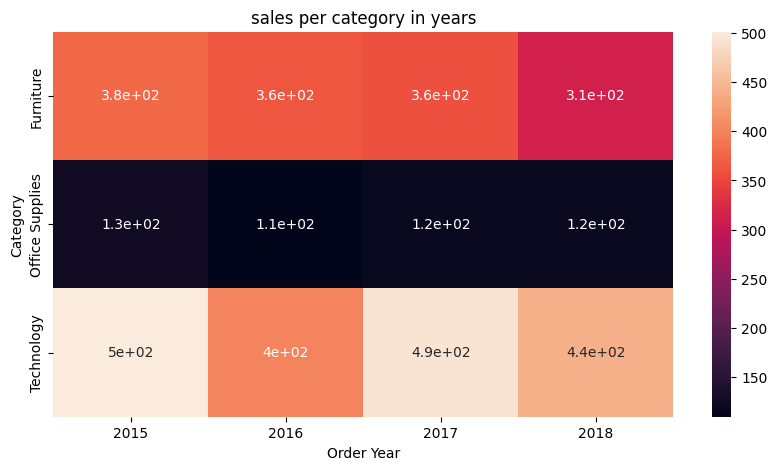

In [15]:
data['Order Year'] = data['Order Date'].dt.year

heatmap_data = pd.pivot_table(data, values='Sales', index='Category', columns='Order Year')

plt.figure(figsize = (10, 5))
sns.heatmap(data = heatmap_data, annot = True)
plt.title('sales per category in years')
plt.show()


Text(0, 0.5, 'Sales')

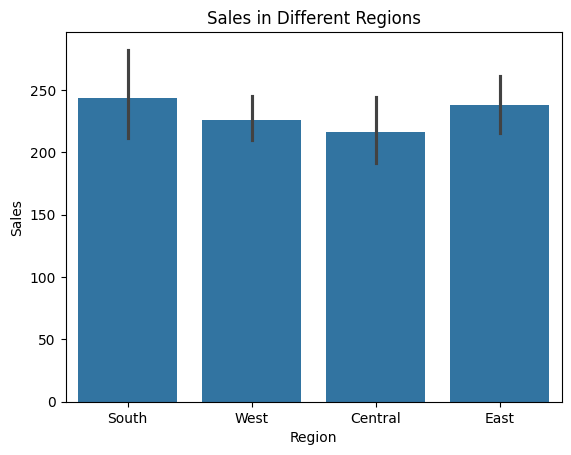

In [16]:
sns.barplot(data = data, x = 'Region', y = 'Sales')
plt.title('Sales in Different Regions')
plt.xlabel('Region')
plt.ylabel('Sales')

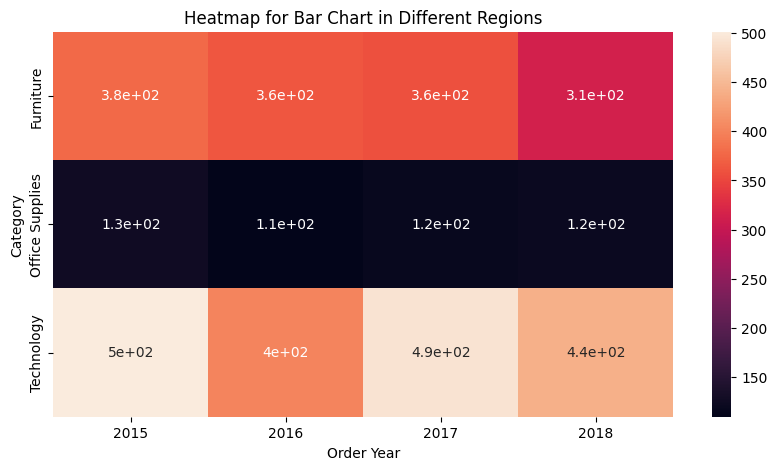

In [17]:

plt.figure(figsize = (10, 5))
sns.heatmap(data = heatmap_data, annot = True)
plt.title('Heatmap for Bar Chart in Different Regions')
plt.show()


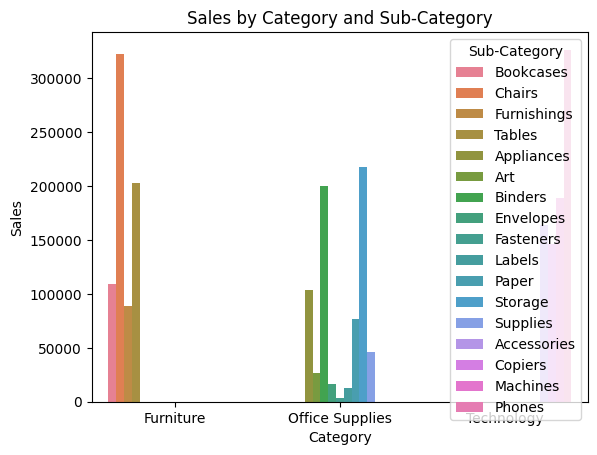

In [18]:
grouped_sales = data.groupby(['Category', 'Sub-Category'])['Sales'].sum()

grouped_sales = grouped_sales.reset_index()

sns.barplot(data = grouped_sales, x = 'Category', y = 'Sales', hue = 'Sub-Category')
plt.title('Sales by Category and Sub-Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.legend(title='Sub-Category')
plt.show()

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Cisco TelePresence System EX90 Videoconferencing Unit'),
  Text(1, 0, 'Canon imageCLASS 2200 Advanced Copier'),
  Text(2, 0, 'GBC Ibimaster 500 Manual ProClick Binding System'),
  Text(3, 0, 'Ibico EPK-21 Electric Binding System'),
  Text(4, 0, '3D Systems Cube Printer, 2nd Generation, Magenta'),
  Text(5, 0, 'HP Designjet T520 Inkjet Large Format Printer - 24" Color')])

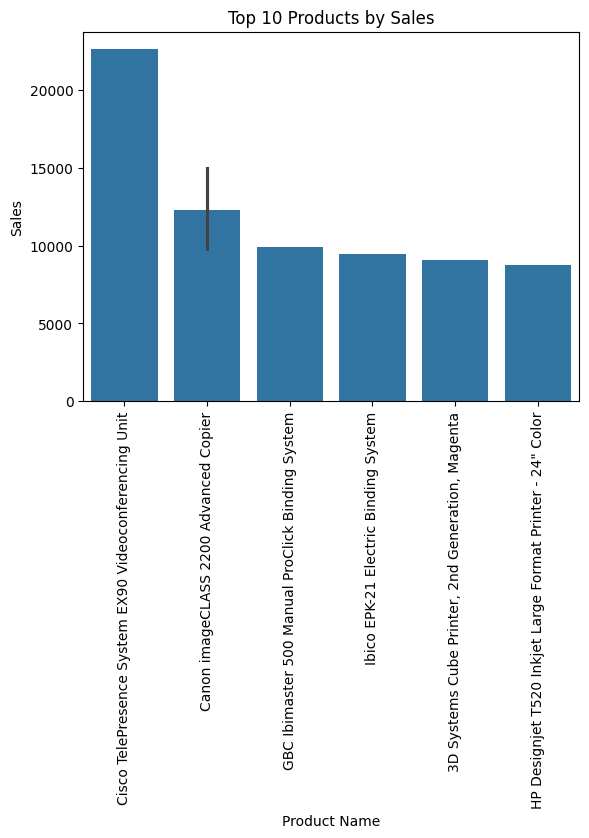

In [19]:
Top_10_sales = data[['Product Name', 'Sales']].sort_values(by = 'Sales', ascending = False).head(10)

sns.barplot(data = Top_10_sales, x = 'Product Name', y = 'Sales')
plt.title('Top 10 Products by Sales')
plt.xlabel('Product Name')
plt.ylabel('Sales')
plt.xticks(rotation = 90)

Text(0, 0.5, 'Sales')

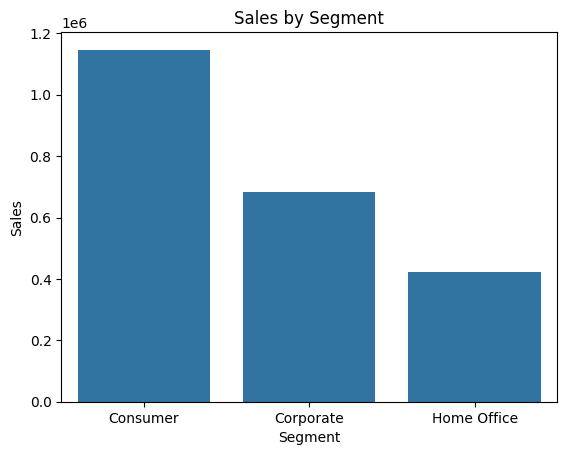

In [20]:
Segmented_sales = data.groupby('Segment')['Sales'].sum()

sns.barplot(x = Segmented_sales.index, y = Segmented_sales)
plt.title('Sales by Segment')
plt.xlabel('Segment')
plt.ylabel('Sales')

Text(0.5, 0, 'Ship Mode')

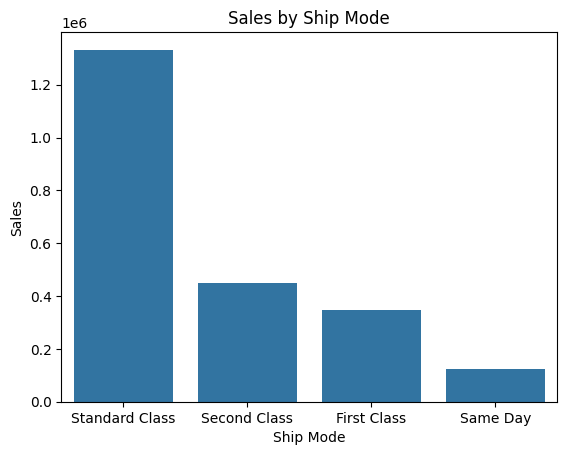

In [21]:
Popular_shipmodes = data.groupby('Ship Mode')['Sales'].sum().sort_values(ascending = False).head(5)

sns.barplot(x = Popular_shipmodes.index, y = Popular_shipmodes)
plt.title('Sales by Ship Mode')
plt.xlabel('Ship Mode')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Sean Miller'),
  Text(1, 0, 'Tamara Chand'),
  Text(2, 0, 'Raymond Buch'),
  Text(3, 0, 'Tom Ashbrook'),
  Text(4, 0, 'Adrian Barton'),
  Text(5, 0, 'Ken Lonsdale'),
  Text(6, 0, 'Sanjit Chand'),
  Text(7, 0, 'Hunter Lopez'),
  Text(8, 0, 'Sanjit Engle'),
  Text(9, 0, 'Christopher Conant')])

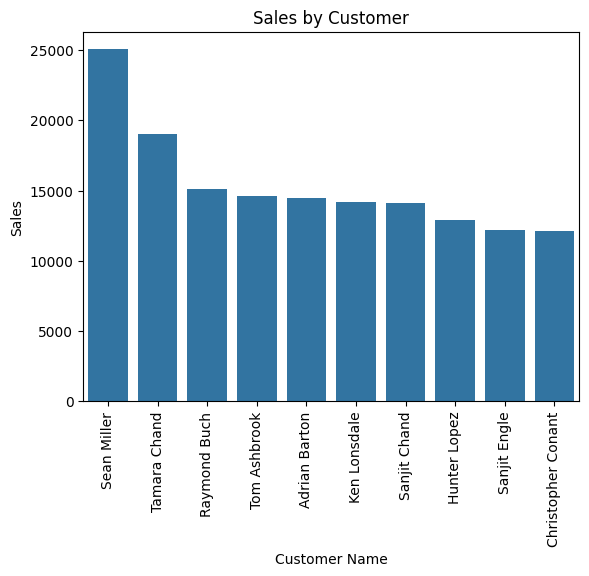

In [22]:
Sales_by_customer = data.groupby('Customer Name')['Sales'].sum().sort_values(ascending = False).head(10)

sns.barplot(x = Sales_by_customer.index, y = Sales_by_customer)
plt.title('Sales by Customer')
plt.xlabel('Customer Name')
plt.xticks(rotation = 90)

Text(0.5, 0, 'Order ID')

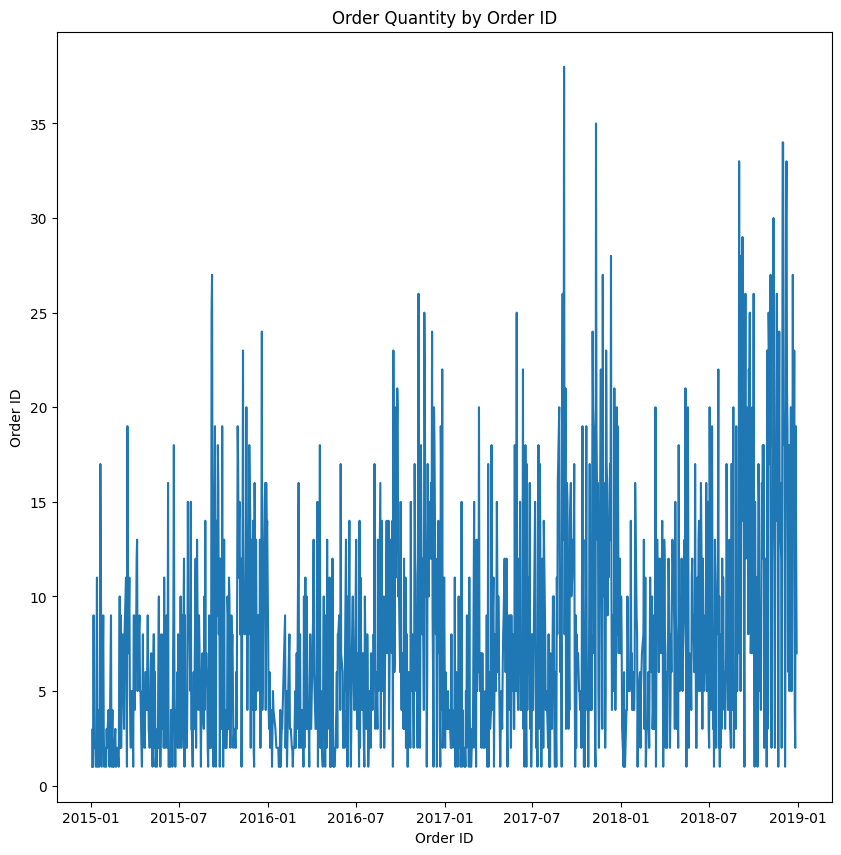

In [23]:
Order_quantity = data.groupby('Order Date')['Order ID'].count()

plt.figure(figsize = (10, 10))

sns.lineplot(data = Order_quantity.reset_index(), x = 'Order Date', y = 'Order ID')
plt.title('Order Quantity by Order ID')
plt.xlabel('Order ID')

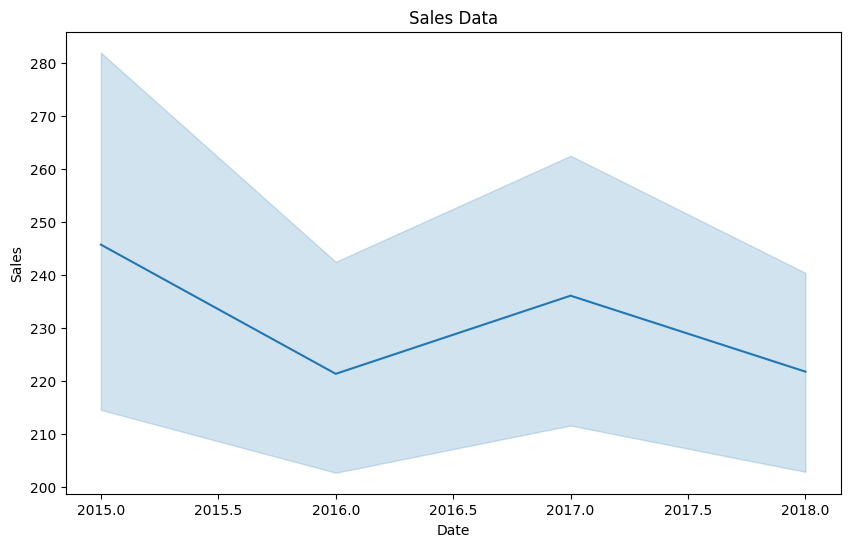

In [24]:

plt.figure(figsize=(10,6))
sns.lineplot(data = data, x = 'Order Year', y = 'Sales') # Use the subset to plot
plt.title('Sales Data')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend
plt.show()

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

In [27]:
data['Year'] = data['Order Date'].dt.year
data['Month'] = data['Order Date'].dt.month
data['Day'] = data['Order Date'].dt.day
data['DayOfWeek'] = data['Order Date'].dt.dayofweek

In [28]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Order Year', 'Year', 'Month', 'Day',
       'DayOfWeek'],
      dtype='object')

In [29]:
feature_variables = [
    'Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region',
    'Category', 'Sub-Category', 'Product Name', 'Year', 'Month', 'Day', 'DayOfWeek'
]
target_variable = 'Sales'

X = data[feature_variables]
y = data[target_variable]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7831, 14), (1958, 14), (7831,), (1958,))

In [30]:
# One-hot encoding
X_train_encoded = pd.get_dummies(X_train, columns=['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region',
    'Category', 'Sub-Category', 'Product Name', 'Year', 'Month', 'Day', 'DayOfWeek'], drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region',
    'Category', 'Sub-Category', 'Product Name', 'Year', 'Month', 'Day', 'DayOfWeek'], drop_first=True)

# Align the columns of X_test to match X_train
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

X_train_encoded.shape, X_test_encoded.shape

((7831, 3053), (1958, 3053))

In [31]:
X_train_encoded.head()

,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Corporate,Segment_Home Office,City_Akron,City_Albuquerque,City_Alexandria,City_Allen,City_Allentown,...,Day_28,Day_29,Day_30,Day_31,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6
3567,False,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
513,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2589,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
7164,False,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
6128,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [32]:
X.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code     float64
Region           object
Category         object
Sub-Category     object
Product Name     object
Year              int32
Month             int32
Day               int32
DayOfWeek         int32
dtype: object

In [33]:
# Fit the linear regression model
model = LinearRegression()
model.fit(X_train_encoded, y_train)

LinearRegression()

In [34]:
y_pred = model.predict(X_test_encoded)

Text(0.5, 1.0, 'Actual vs. Predicted Sales')

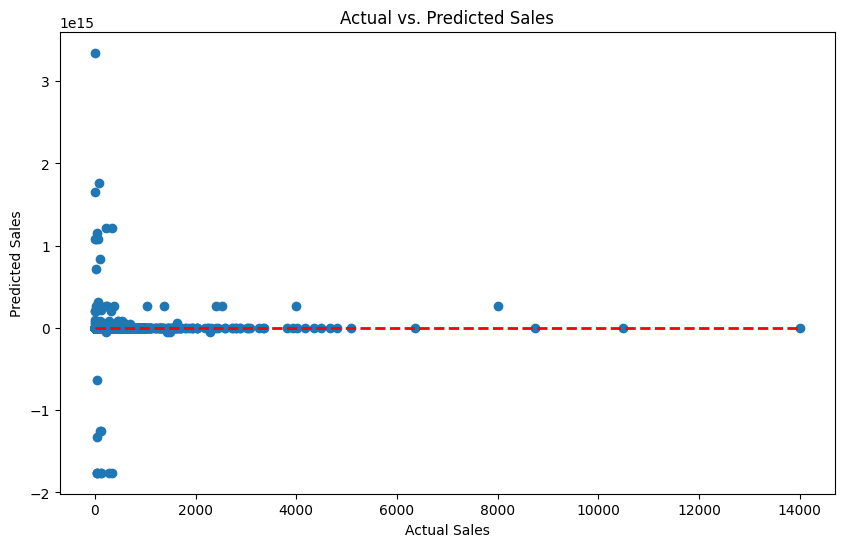

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test,y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Diagonal line
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)


Mean Absolute Error (MAE): 19386120300155.273
Mean Squared Error (MSE): 2.7706542680610994e+28
R-squared (R²): -5.664410554931715e+22


In [37]:
pip install shap



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
import shap

explainer = shap.Explainer(model, X_train_encoded)
shap_values = explainer(X_train_encoded)


shap_vales_array = np.array( shap_values.values)

shap_vales_array

c:\Program Files\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


array([[ -1.10725169,  18.03028701, -15.30199263, ...,   1.785     ,
         12.555     ,  -4.8375    ],
       [ -1.10725169,  -3.18181535,   8.98688456, ...,  -8.715     ,
         -2.945     ,  -4.8375    ],
       [ -1.10725169,  -3.18181535,   8.98688456, ...,  -8.715     ,
         -2.945     ,  -4.8375    ],
       ...,
       [ -1.10725169,  -3.18181535,   8.98688456, ...,   1.785     ,
         -2.945     ,  -4.8375    ],
       [ -1.10725169,  -3.18181535,   8.98688456, ...,   1.785     ,
         -2.945     ,  -4.8375    ],
       [ -1.10725169,  -3.18181535,   8.98688456, ...,   1.785     ,
         -2.945     ,  -4.8375    ]])

In [39]:
shap_values_df = pd.DataFrame(shap_vales_array, columns=X_train_encoded.columns)
shap_values_df.to_csv('shap_values.csv', index=False)

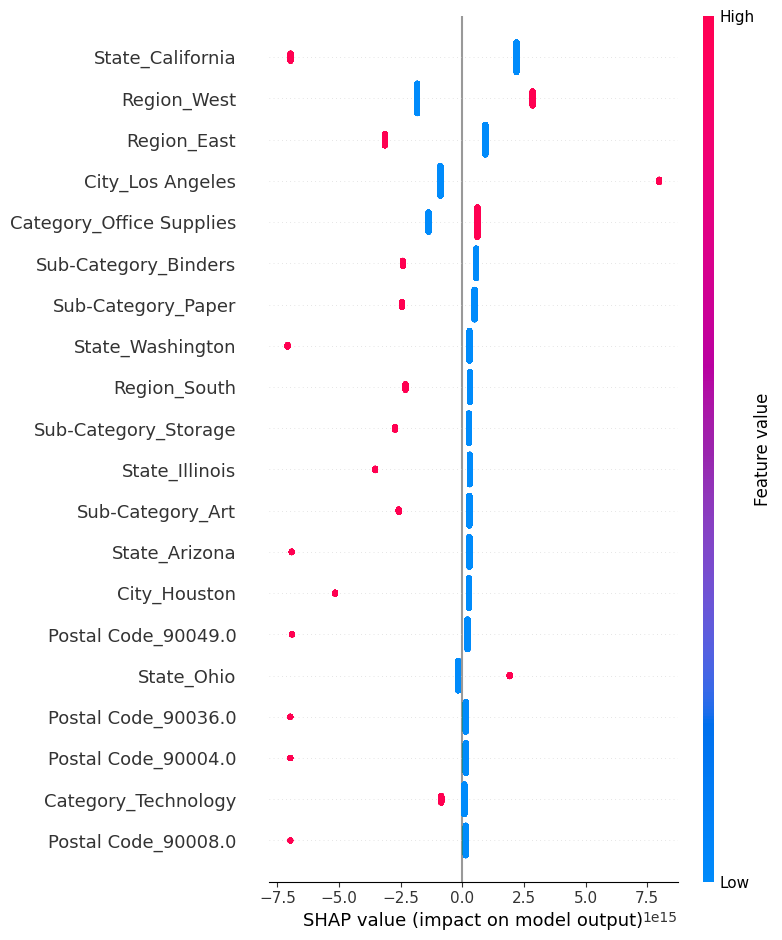

In [40]:
shap.summary_plot(shap_vales_array, X_train_encoded)

In [41]:
pip install joblib



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
import joblib

joblib.dump(model, 'logistic_model.pkl')

['logistic_model.pkl']

In [43]:
data.head(1000)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Order Year,Year,Month,Day,DayOfWeek
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017,2017,11,8,2
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017,2017,11,8,2
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017,2017,6,12,0
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016,2016,10,11,1
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016,2016,10,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,CA-2015-117639,2015-05-21,2015-05-25,Standard Class,MW-18235,Mitch Willingham,Corporate,United States,Virginia Beach,...,TEC-PH-10001530,Technology,Phones,Plantronics Voyager Pro Legend,617.9700,2015,2015,5,21,3
996,997,CA-2016-162537,2016-10-28,2016-11-03,Standard Class,RD-19585,Rob Dowd,Consumer,United States,Henderson,...,OFF-EN-10003862,Office Supplies,Envelopes,Laser & Ink Jet Business Envelopes,10.6700,2016,2016,10,28,4
997,998,CA-2016-162537,2016-10-28,2016-11-03,Standard Class,RD-19585,Rob Dowd,Consumer,United States,Henderson,...,OFF-ST-10004258,Office Supplies,Storage,Portable Personal File Box,36.6300,2016,2016,10,28,4
998,999,CA-2016-162537,2016-10-28,2016-11-03,Standard Class,RD-19585,Rob Dowd,Consumer,United States,Henderson,...,FUR-FU-10002885,Furniture,Furnishings,Magna Visual Magnetic Picture Hangers,24.1000,2016,2016,10,28,4


In [44]:
print(type(model))

<class 'sklearn.linear_model._base.LinearRegression'>
